In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPool1D
from tensorflow.keras.models import load_model
import tensorflow as tf

import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

In [2]:
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
df = pd.read_csv('../data/raw_recording.csv')

df = df[:int(len(df) * 3/4)]

In [4]:
for i in range(1,500):

    df[f'channel_1_{i}'] = df['channel_1'].shift(i)
    df[f'channel_2_{i}'] = df['channel_2'].shift(i)
    df[f'channel_3_{i}'] = df['channel_3'].shift(i)
    df[f'channel_4_{i}'] = df['channel_4'].shift(i)
    df[f'x_pos_-{i}'] = df['x_pos'].shift(i)
    df[f'y_pos_-{i}'] = df['y_pos'].shift(i)

In [5]:
df['x_diff'] = df['x_pos'].diff()
df['y_diff'] = df['y_pos'].diff()

In [6]:
df.dropna(inplace=True)

In [7]:
df.reset_index(drop=True).head()

,x_pos,y_pos,channel_1,channel_2,channel_3,channel_4,channel_1_1,channel_2_1,channel_3_1,channel_4_1,...,x_pos_-498,y_pos_-498,channel_1_499,channel_2_499,channel_3_499,channel_4_499,x_pos_-499,y_pos_-499,x_diff,y_diff
0,1740.0,1038.0,111,302,39,16,111.0,302.0,39.0,16.0,...,2491.0,1219.0,0.0,0.0,0.0,0.0,2491.0,1219.0,0.0,0.0
1,1736.0,1038.0,111,302,39,16,111.0,302.0,39.0,16.0,...,2489.0,1217.0,551.0,86.0,24.0,14.0,2491.0,1219.0,-4.0,0.0
2,1731.0,1037.0,110,301,39,16,111.0,302.0,39.0,16.0,...,2488.0,1216.0,120.0,86.0,24.0,19.0,2489.0,1217.0,-5.0,-1.0
3,1731.0,1037.0,111,301,39,16,110.0,301.0,39.0,16.0,...,2484.0,1214.0,120.0,86.0,24.0,25.0,2488.0,1216.0,0.0,0.0
4,1728.0,1036.0,110,300,39,16,111.0,301.0,39.0,16.0,...,2482.0,1212.0,120.0,85.0,24.0,26.0,2484.0,1214.0,-3.0,-1.0


In [8]:
X = np.array(df.drop(columns=['x_pos', 'y_pos', 'x_diff', 'y_diff']))
y = np.array(df[['x_pos', 'y_pos']])


In [9]:
X

array([[1.110e+02, 3.020e+02, 3.900e+01, ..., 0.000e+00, 2.491e+03,
        1.219e+03],
       [1.110e+02, 3.020e+02, 3.900e+01, ..., 1.400e+01, 2.491e+03,
        1.219e+03],
       [1.100e+02, 3.010e+02, 3.900e+01, ..., 1.900e+01, 2.489e+03,
        1.217e+03],
       ...,
       [1.130e+02, 6.100e+01, 1.000e+00, ..., 7.000e+00, 2.335e+03,
        1.839e+03],
       [1.130e+02, 6.100e+01, 0.000e+00, ..., 7.000e+00, 2.335e+03,
        1.839e+03],
       [1.130e+02, 6.100e+01, 0.000e+00, ..., 8.000e+00, 2.334e+03,
        1.839e+03]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [12]:
model = Sequential()
model.add(Conv1D(64, kernel_size = 3, input_shape = (X.shape[1],1,)))
model.add(Conv1D(32, kernel_size = 3, input_shape = (X.shape[1],1,)))
model.add(GlobalMaxPool1D())
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(2, activation=tf.keras.activations.linear))

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['acc'])


In [13]:
model.fit(X_train.reshape((X_train.shape[0],X_train.shape[1],1,)), y_train,
          validation_data = (X_test.reshape((X_test.shape[0],X_test.shape[1],1,)), y_test), epochs = 300)

Train on 47474 samples, validate on 15825 samples
Epoch 1/300
47474/47474 [==============================] - 8s 165us/sample - loss: 235535.0081 - acc: 0.9101 - val_loss: 95244.6595 - val_acc: 0.9596
Epoch 2/300
47474/47474 [==============================] - 6s 133us/sample - loss: 80172.8834 - acc: 0.9582 - val_loss: 75942.2427 - val_acc: 0.9615
Epoch 3/300
47474/47474 [==============================] - 6s 132us/sample - loss: 68330.2802 - acc: 0.9595 - val_loss: 83816.4005 - val_acc: 0.9635
Epoch 4/300
47474/47474 [==============================] - 6s 133us/sample - loss: 63017.1686 - acc: 0.9626 - val_loss: 51251.2586 - val_acc: 0.9670
Epoch 5/300
47474/47474 [==============================] - 6s 132us/sample - loss: 47408.1741 - acc: 0.9724 - val_loss: 40821.9148 - val_acc: 0.9781
Epoch 6/300
47474/47474 [==============================] - 6s 132us/sample - loss: 42646.1497 - acc: 0.9732 - val_loss: 41413.3092 - val_acc: 0.9728
Epoch 7/300
47474/47474 [==============================

KeyboardInterrupt: 

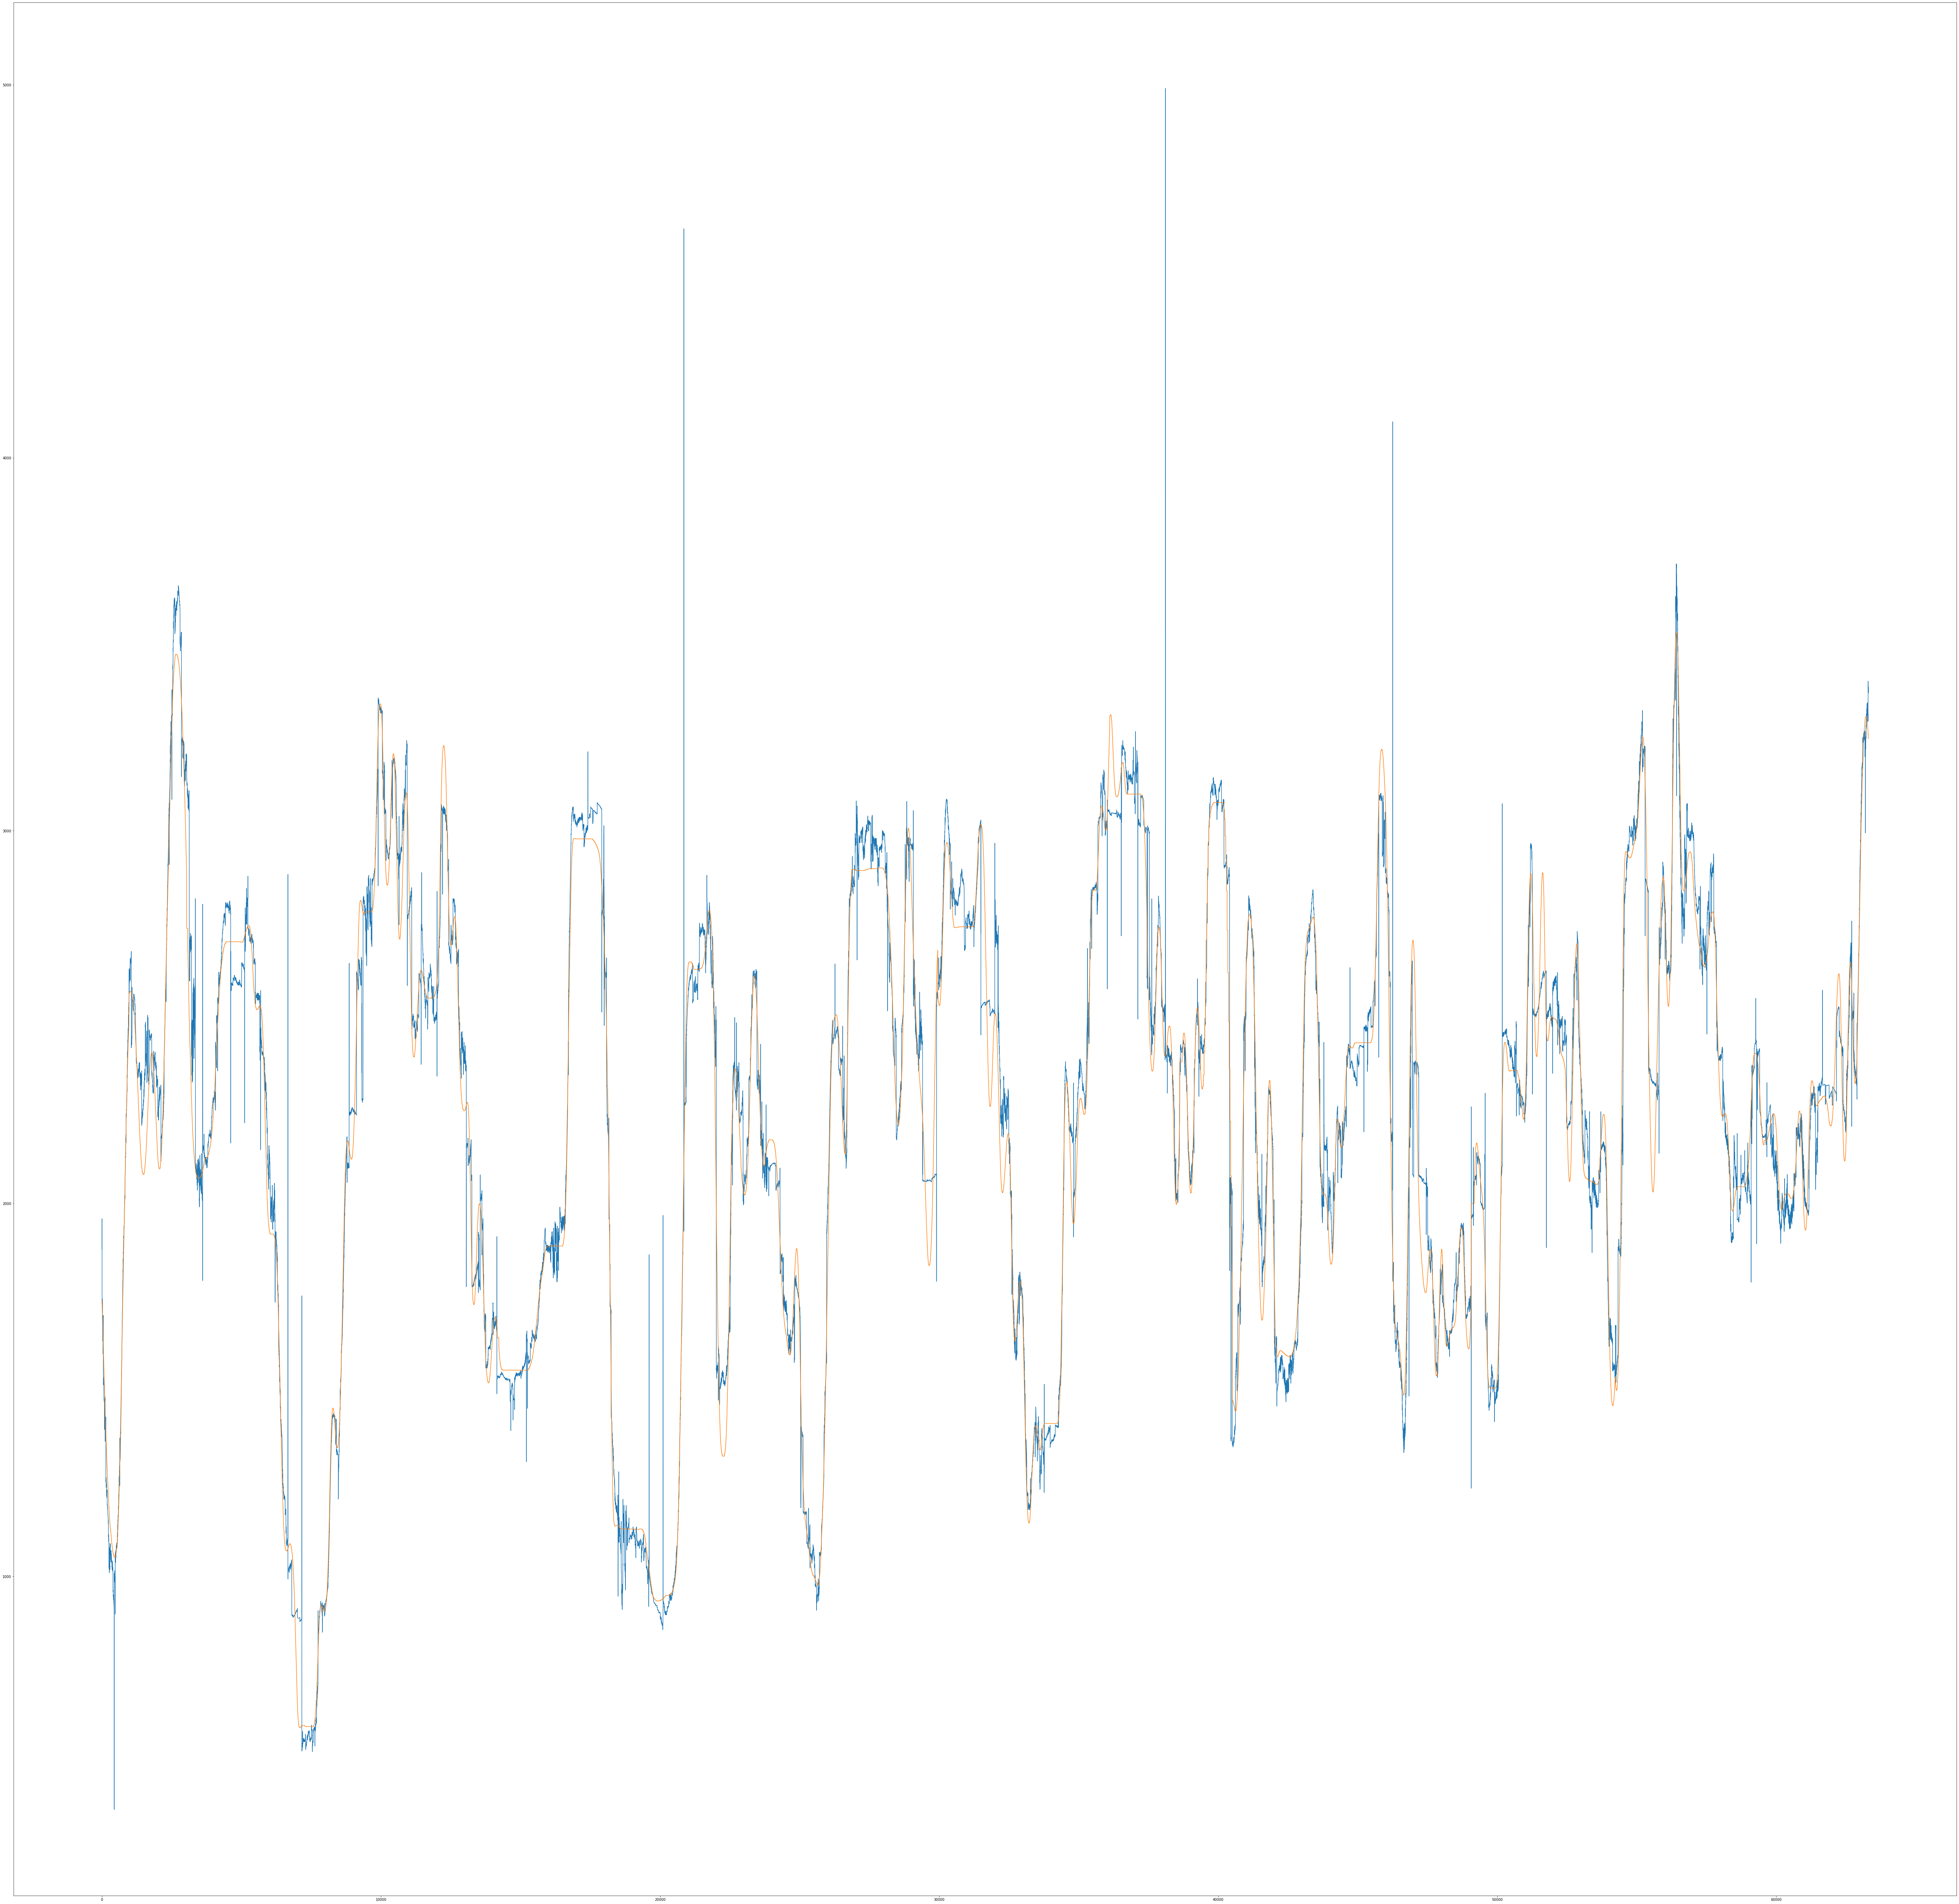

In [14]:
plt.figure(figsize=(100,100))

plt.plot(model.predict(X.reshape((X.shape[0],X.shape[1],1,)))[:,0])
plt.plot(y[:,0])

In [ ]:
plt.figure(figsize=(100,100))

plt.plot(model.predict(X.reshape((X.shape[0],X.shape[1],1,)))[:,1])
plt.plot(y[:,1])


In [ ]:
ploty = pd.DataFrame({'x_pred':model.predict(X.reshape((X.shape[0],X.shape[1],1,)))[:,0],
                      'y_pred':model.predict(X.reshape((X.shape[0],X.shape[1],1,)))[:,1],
                      'x_diff':df['x_diff'], 'y_diff':df['y_diff']})






In [ ]:
ploty['x_pred_diff'] = ploty['x_pred'].diff()
ploty['y_pred_diff'] = ploty['y_pred'].diff()

In [ ]:
ploty.dropna(inplace=True)

In [ ]:
plt.figure(figsize=(100,100))

plt.plot(ploty['x_pred_diff'][:1000])
plt.plot(ploty['x_diff'][:1000], alpha = .5)

In [ ]:
# model.save('../pickled_models/pos_nn')